In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
x = pd.read_csv('/home/lagovsp/ml-tasks/ML1.1 linear regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('/home/lagovsp/ml-tasks/ML1.1 linear regression/data/y.csv', index_col=0)['0']

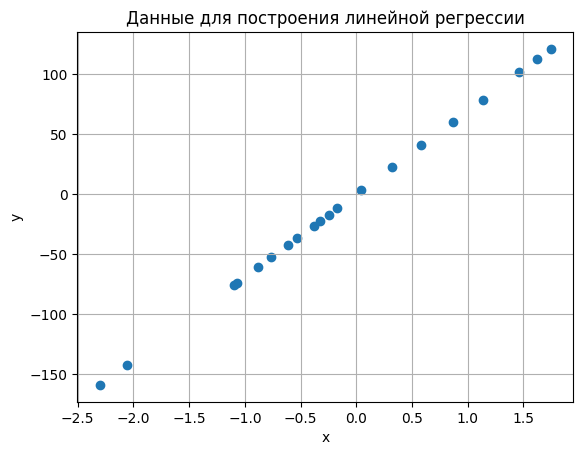

In [65]:
plt.figure()
plt.scatter(x, y)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Данные для построения линейной регрессии')
plt.show()

In [66]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X

    def errorMSE(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def errorMAE(self, X, Y):
        return np.mean(np.abs(self.predict(X) - Y))

    def fit(self, X, Y, alpha=0.001, max_steps=5000):
        steps, errors = [], []
        step = 0
        while step < max_steps:
            predict_x = self.predict(X)
            dJ0 = sum(predict_x - Y) /len(X)
            dJ1 = sum((predict_x - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.errorMSE(X, Y)
            step += 1  
            steps.append(step)
            errors.append(new_err)
        return steps, errors

Шаги град спуска: 5000
MSE после град спуска: 0.03937321303112907
MAE после град спуска: 0.22423315690468656


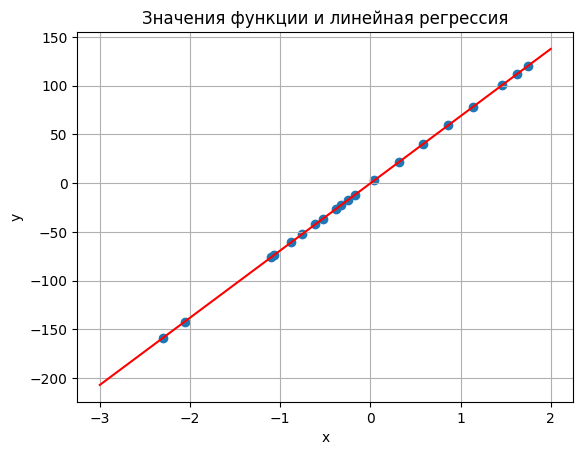

In [67]:
# Проверьте работу модели с разными начальными значениями
# параметров. Убедитесь всегда сходится к оптимуму.
hyp = Model()

steps, errors = hyp.fit(x, y, max_steps=5000)
# Mean Squared Error (MSE) and Mean Absolute Error (MAE)
print("Шаги град спуска:", len(steps))
print("MSE после град спуска:", hyp.errorMSE(x, y))
print("MAE после град спуска:", hyp.errorMAE(x, y))

X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Значения функции и линейная регрессия')
plt.show()

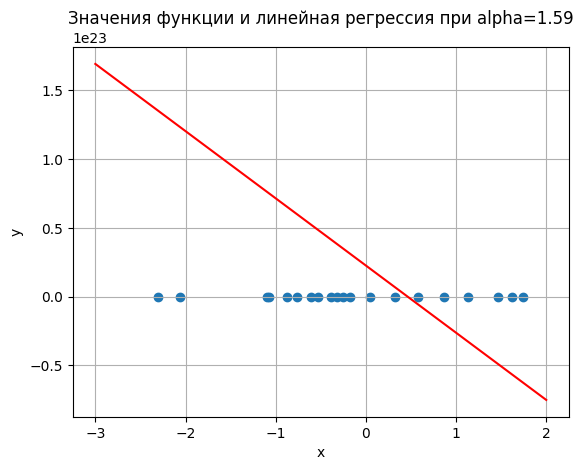

In [68]:
hyp = Model()

alpha_max = 1.59 # 1.5 еще ок, 1.59 уже не ок
# Проверьте работу модели с другими значениями скорости обучения.
# Найдите значение, при котором градиентный спуск расходится.
steps, errors = hyp.fit(x, y, max_steps=1000, alpha=alpha_max)

X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Значения функции и линейная регрессия при alpha={alpha_max}')
plt.show()

In [69]:
# Модифицируйте код модели таким образом, чтобы он корректно
# работал как с Series, так и с DataFrame. При этом,
# конечно, датафрейм не должен содержать "лишних" столбцов.

class Model(object):
    """Модель парной линейной регрессии"""
    def errorMSE(self, X, Y = None):
        X, Y = Model.check_and_convert_df_to_series(X, Y)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def errorMAE(self, X, Y = None):
        X, Y = Model.check_and_convert_df_to_series(X, Y)
        return np.mean(np.abs(self.predict(X) - Y))
    
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    @staticmethod
    def check_and_convert_df_to_series(X, Y):
        if type(X) is pd.core.frame.DataFrame:
            return X.iloc[:, 0], X.iloc[:, 1]
        elif Y is None:
            raise TypeError("поле Y необходимо когда используется Series")
        return X, Y

    def predict(self, X):
        return self.b0 + self.b1 * X

    def fit(self, X, Y=None,
            alpha=0.001, max_steps=5000):
        X, Y = Model.check_and_convert_df_to_series(X, Y)
        steps, errors = [], []
        step = 0
        while step < max_steps:
            predict_x = self.predict(X)
            dJ0 = sum(predict_x - Y) /len(X)
            dJ1 = sum((predict_x - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.errorMSE(X, Y)
            step += 1  
            steps.append(step)
            errors.append(new_err)
        return steps, errors

x = pd.read_csv('/home/lagovsp/ml-tasks/ML1.1 linear regression/data/x.csv', index_col=0)
y = pd.read_csv('/home/lagovsp/ml-tasks/ML1.1 linear regression/data/y.csv', index_col=0)

hyp = Model()
df = pd.concat([x, y], axis=1)
hyp.fit(df)
print("MSE после град спуска:", hyp.errorMSE(df))
print("MAE после град спуска:", hyp.errorMAE(df))

MSE после град спуска: 0.03937321303112907
MAE после град спуска: 0.22423315690468656


In [ ]:
# Модифицируйте алгоритм градиентного спука таким образом,
# чтобы он останавливаля, если ошибка перестает снижаться.
# Для этого сравнивайте, на сколько понизилась ошибка на
# каждом шаге и если это снижение меньше некоторой заранее
# заданной очень маленькой величины - выходите из цикла.
# Эту величину можно взять одну миллионную, например.

class Model(object):
    """Модель парной линейной регрессии"""

    def errorMSE(self, X, Y = None):
        X, Y = Model.check_and_convert_df_to_series(X, Y)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def errorMAE(self, X, Y = None):
        X, Y = Model.check_and_convert_df_to_series(X, Y)
        return np.mean(np.abs(self.predict(X) - Y))
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    @staticmethod
    def check_and_convert_df_to_series(X, Y):
        if type(X) is pd.core.frame.DataFrame:
            return X.iloc[:, 0], X.iloc[:, 1]
        elif Y is None:
            raise TypeError("поле Y необходимо когда используется Series")
        return X, Y

    def predict(self, X):
        return self.b0 + self.b1 * X

    def fit(
        self, X, Y=None, alpha=0.001, accuracy=0.01, max_steps=5000
    ):
        X, Y = Model.check_and_convert_df_to_series(X, Y)
        steps, errors = [], []
        step = 0
        while step < max_steps:
            predict_x = self.predict(X)
            dJ0 = sum(predict_x - Y) /len(X)
            dJ1 = sum((predict_x - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.errorMSE(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if new_err <= accuracy:
                # вот тут
                break
        return steps, errors

x = pd.read_csv('/home/lagovsp/ml-tasks/ML1.1 linear regression/data/x.csv', index_col=0)
y = pd.read_csv('/home/lagovsp/ml-tasks/ML1.1 linear regression/data/y.csv', index_col=0)

hyp = Model()
df = pd.concat([x, y], axis=1)
steps, errors = hyp.fit(df, max_steps=10000, accuracy=0.00001)
print("Шаги град спуска:", len(steps))
print("MSE после град спуска:", hyp.errorMSE(df))
print("MAE после град спуска:", hyp.errorMAE(df))

Шаги град спуска: 9320
MSE после град спуска: 9.991600220351026e-06
MAE после град спуска: 0.0038963739409818565


In [71]:
# Убедитесь, что алгоритм градиентного спуска завершается всегда -
# либо если ошибка перестает существенно меняться, либо при достижении
# максимального количества шагов

hyp = Model()
df = pd.concat([x, y], axis=1)
steps, errors = hyp.fit(df, max_steps=10000, accuracy=0.0000001)
print("Steps for gradient descent:", len(steps))
print("MSE after gradient descent:", hyp.errorMSE(df))
print("MAE after gradient descent:", hyp.errorMAE(df))

hyp = Model()
df = pd.concat([x, y], axis=1)
steps, errors = hyp.fit(df, max_steps=5, accuracy=0.0000001)
print("Steps for gradient descent:", len(steps))
print("MSE after gradient descent:", hyp.errorMSE(df))
print("MAE after gradient descent:", hyp.errorMAE(df))

hyp = Model()
df = pd.concat([x, y], axis=1)
steps, errors = hyp.fit(df, max_steps=10000, accuracy=0.0000001, alpha=0.0000001)
print("Steps for gradient descent:", len(steps))
print("MSE after gradient descent:", hyp.errorMSE(df))
print("MAE after gradient descent:", hyp.errorMAE(df))

Steps for gradient descent: 10000
MSE after gradient descent: 2.776975306057215e-06
MAE after gradient descent: 0.0020602982481382924
Steps for gradient descent: 5
MSE after gradient descent: 2901.368547860564
MAE after gradient descent: 62.62230017951201
Steps for gradient descent: 10000
MSE after gradient descent: 2930.3575207240237
MAE after gradient descent: 62.938110602967


Steps for gradient descent: 6
MSE after gradient descent: 0.0008603627290350645
MAE after gradient descent: 0.035142342499239906
Alpha: 1


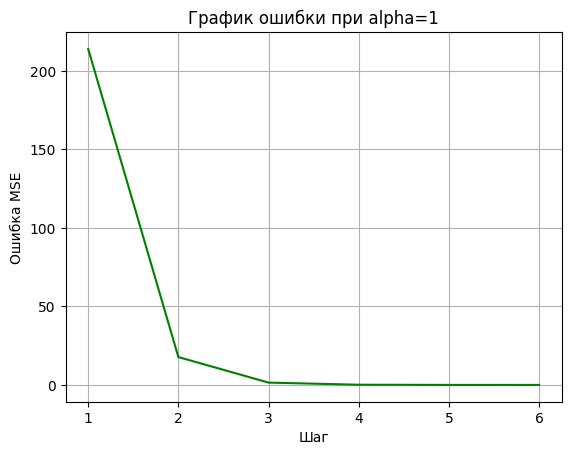

In [ ]:
# Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную
# параметр _alpha_ можно отслеживать, увеличивается ли ошибка после первого шага
# градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка
# после одного шага увеличивается - скорость обучения надо уменьшить (например, в
# 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте,
# как после уменьшения скорости перезапускать градиентный спуск заново.

class Model(object):
    """Модель парной линейной регрессии"""

    def errorMSE(self, X, Y=None):
        X, Y = Model.check_and_convert_df_to_series(X, Y)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def errorMAE(self, X, Y=None):
        X, Y = Model.check_and_convert_df_to_series(X, Y)
        return np.mean(np.abs(self.predict(X) - Y))

    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    @staticmethod
    def check_and_convert_df_to_series(X, Y):
        if type(X) is pd.core.frame.DataFrame:
            return X.iloc[:, 0], X.iloc[:, 1]
        elif Y is None:
            raise TypeError("поле Y необходимо когда используется Series")
        return X, Y

    def predict(self, X):
        return self.b0 + self.b1 * X

    def fit(self, X, Y=None, alpha=1, accuracy=0.01, max_steps=5000):
        X, Y = Model.check_and_convert_df_to_series(X, Y)
        steps, errors = [], []
        step = 0
        while step < max_steps:
            predict_x = self.predict(X)
            dJ0 = sum(predict_x - Y) /len(X)
            dJ1 = sum((predict_x - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.errorMSE(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if new_err < accuracy:
                break
            if len(errors) >= 2:
                if errors[-2] < new_err:
                    alpha -= alpha/20
                    self.b0 = self.b1 = step = 0
                    steps, errors = [], []

        return steps, errors, alpha

hyp = Model()
steps, errors, alpha = hyp.fit(df, max_steps=10000, accuracy=0.001)
print("Шагов град спуска:", len(steps))
print("MSE после град спуска:", hyp.errorMSE(df))
print("MAE после град спуска:", hyp.errorMAE(df))
print("Alpha:", alpha)

plt.figure()
plt.grid()
plt.plot(steps, errors, 'g')
plt.xlabel("Шаг")
plt.ylabel("Ошибка MSE")
plt.title(f"График ошибки при alpha={alpha}")
plt.show()

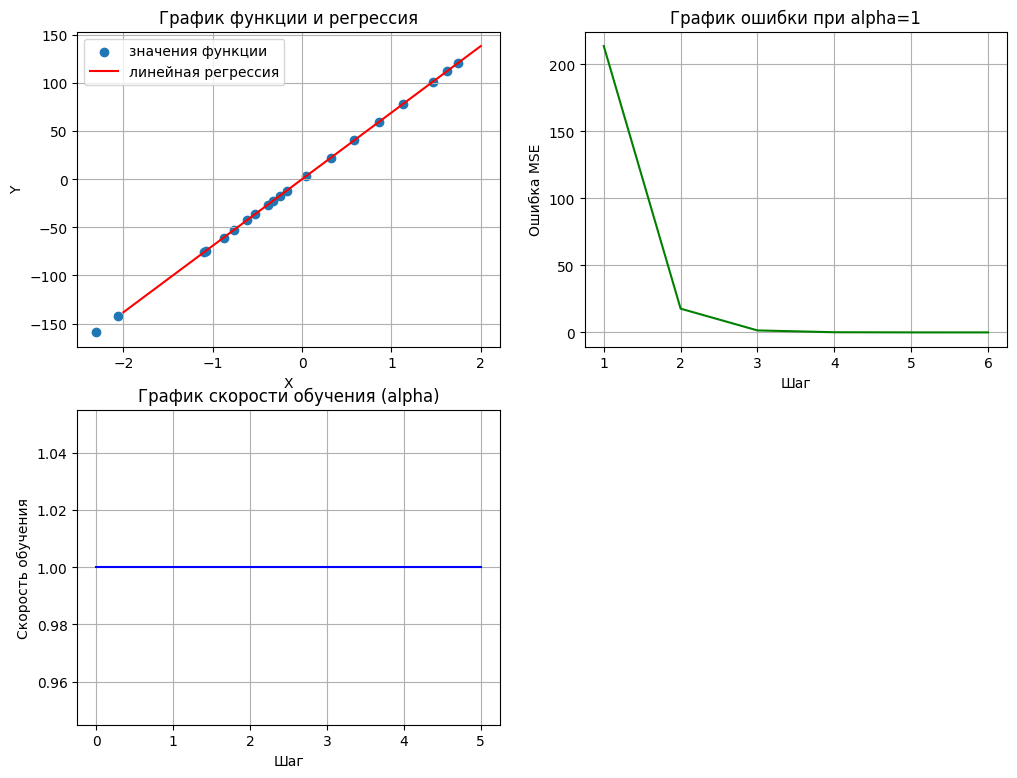

In [73]:
# Добавьте к классу модели метод рисования графиков. Сделайте так,
# чтобы он был независим от масштаба переданных данных.

class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.steps= []
        self.errors = []
        self.X = None
        self.Y = None
        self.alphas = []

    @staticmethod
    def check_and_convert_df_to_series(X, Y):
        if type(X) is pd.core.frame.DataFrame:
            return X.iloc[:, 0], X.iloc[:, 1]
        elif Y is None:
            raise TypeError("Y field is required when using Series")
        return X, Y

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error_mse(self, X, Y=None):
        X, Y = Model.check_and_convert_df_to_series(X, Y)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def error_mae(self, X, Y=None):
        X, Y = Model.check_and_convert_df_to_series(X, Y)
        return np.mean(np.abs(self.predict(X) - Y))

    def fit(self, X, Y=None, alpha=1, accuracy=0.01, max_steps=5000):
        self.X, self.Y = Model.check_and_convert_df_to_series(X, Y)
        self.steps, self.errors = [], []
        step = 0
        while step < max_steps:
            predict_x = self.predict(self.X)
            dJ0 = sum(predict_x - self.Y) /len(self.X)
            dJ1 = sum((predict_x - self.Y) * self.X) /len(self.X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error_mse(self.X, self.Y)
            step += 1
            self.steps.append(step)
            self.errors.append(new_err)
            self.alphas.append(alpha)
            if new_err < accuracy:
                break
            if len(self.errors) >= 2:
                if self.errors[-2] < new_err:
                    alpha -= alpha/20
                    self.b0 = self.b1 = step = 0
                    self.steps, self.errors = [], []
    
        return self.steps, self.errors, alpha
    
    def create_plots(self):
        plt.figure(figsize=(12, 9))
        plt.subplot(2, 2, 1)

        x_min = int(min(self.X))
        x_max = int(max(self.X)) + 1

        X0 = np.linspace(x_min, x_max, 100)
        Y0 = hyp.predict(X0)
        plt.scatter(x, y)
        plt.plot(X0, Y0, 'r')
        plt.title("График функции и регрессия")
        plt.ylabel("Y")
        plt.xlabel("X")
        plt.legend(["значения функции", "линейная регрессия"])
        plt.grid()

        plt.subplot(2, 2, 2)
        plt.plot(self.steps, self.errors, 'g')
        plt.xlabel("Шаг")
        plt.ylabel("Ошибка MSE")
        plt.title(f"График ошибки при alpha={alpha}")
        plt.grid()

        plt.subplot(2, 2, 3)
        overall_steps = [_ for _ in range(len(self.alphas))]
        plt.plot(overall_steps, self.alphas, 'b')
        plt.xlabel("Шаг")
        plt.ylabel("Скорость обучения")
        plt.title("График скорости обучения (alpha)")
        plt.grid()
        plt.show()

hyp = Model()
steps, errors, alpha = hyp.fit(df, max_steps=10000, accuracy=0.001)
hyp.create_plots()